# **Inicialização do Dataset**

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_enem = pd.read_csv("path_to_dataset")

# **Geração HTML**

In [ ]:
!pip install sweetviz

In [ ]:
!pip install pandas-profiling

In [ ]:
import sweetviz as sv
import pandas_profiling as pf

In [ ]:
df_enem['TP_ENSINO'] = df_enem['TP_ENSINO'].astype(str)
analise_after = sv.analyze(df_enem)
analise_after.show_html("analisesweet.html")

In [ ]:
profile = pf.ProfileReport(df_enem)
profile.to_file('analiseprofilling.html')

# **Tratamento de Dados / Feature Engineering**




In [ ]:
df_enem

In [6]:
def regiao_sex_drop(df):
    sex_dict = {
        'F': 1,
        'M': 2,
    }

    #POR REGIÃO
    co_uf_diff = {
        11: 1, #Rondonia / NORTE
        12: 1, #Acre / NORTE
        13: 1, #Amazonas / NORTE
        14: 1, #Roraima / NORTE
        15: 1, #Pará / NORTE
        16: 1, #Amapá / NORTE
        17: 1, #Tocantins / NORTE
        21: 2, #Maranhão / NORDESTE
        22: 2, #Piaui / NORDESTE
        23: 2, #Ceará / NORDESTE
        24: 2, #Rio grande do norte / NORDESTE
        25: 2, #Paraiba / NORDESTE
        26: 2, #Pernambuco / NORDESTE
        27: 2, #Alagoas / NORDESTE
        28: 2, #Sergipe / NORDESTE
        29: 2, #Bahia / NORDESTE
        31: 3, #Minas Gerais / SUDESTE
        32: 3, #Espirito Santo / SUDESTE
        33: 3, #Rio de Janeiro / SUDESTE
        35: 3, #São Paulo  / SUDESTE
        41: 4, #Paraná / SUL
        42: 4, #Santa Catarina / SUL
        43: 4, #Rio grande do sul / SUL
        50: 5, #Mato Grosso do Sul / CENTRO-OESTE
        51: 5, #Mato Grosso / CENTRO-OESTE
        52: 5, #Goias / CENTRO-OESTE
        53: 5, #Distrito Federal / CENTRO-OESTE
    }

    """
    #POR IDH
    co_uf_diff = {
        11: 2, #Rondonia / Médio desenvolvimento
        12: 2, #Acre / Médio desenvolvimento
        13: 2, #Amazonas / Médio desenvolvimento
        14: 1, #Roraima / Baixo desenvolvimento
        15: 2, #Pará / Médio desenvolvimento
        16: 2, #Amapá / Médio desenvolvimento
        17: 2, #Tocantins / Médio desenvolvimento
        21: 1, #Maranhão / Baixo desenvolvimento
        22: 1, #Piauí / Baixo desenvolvimento
        23: 1, #Ceará / Baixo desenvolvimento
        24: 1, #Rio grande do norte / Baixo desenvolvimento
        25: 1, #Paraiba / Baixo desenvolvimento
        26: 1, #Pernambuco / Baixo desenvolvimento
        27: 1, #Alagoas / Baixo desenvolvimento
        28: 1, #Sergipe / Baixo desenvolvimento
        29: 1, #Bahia / Baixo desenvolvimento
        31: 4, #Minas Gerais / Alto desenvolvimento
        32: 4, #Espirito Santo / Alto desenvolvimento
        33: 4, #Rio de Janeiro / Alto desenvolvimento
        35: 4, #São Paulo / Alto desenvolvimento
        41: 4, #Paraná / Alto desenvolvimento
        42: 4, #Santa Catarina / Alto desenvolvimento
        43: 4, #Rio grande do sul / Alto desenvolvimento
        50: 4, #Mato Grosso do Sul / Alto desenvolvimento
        51: 4, #Mato Grosso / Alto desenvolvimento
        52: 4, #Goias / Alto desenvolvimento
        53: 4, #Distrito Federal / Alto desenvolvimento
    }
    """


    q006_dict = {

        #1 -> 0 - 1.908,00
        #2 -> 1.908,01 - 4.770,00
        #3 -> 4.770,01 - 8.586,00
        #4 -> 8.586,01 -

        'A':1,
        'B':1,
        'C':1,
        'D':2,
        'E':2,
        'F':2,
        'G':2,
        'H':2,
        'I':3,
        'J':3,
        'K':3,
        'L':3,
        'M':4,
        'N':4,
        'O':4,
        'P':4,
        'Q':4,
    }

    '''
        faixa_et_dict = {
        1: 1,
        2: 1,
        3: 1,
        4: 1,
        5: 1,
        6: 1,
        7: 1,
        8: 1,
        9: 1,
        10: 1,
        11: 2,
        12: 2,
        13: 2,
        14: 2,
        15: 2,
        16: 2,
        17: 2,
        18: 2,
        19: 2,
        20: 2,
    }
    '''


    df['Q006'] = df['Q006'].replace(q006_dict)
    df['TP_SEXO'] = df['TP_SEXO'].replace(sex_dict)
    df['CO_UF_ESC'] = df['CO_UF_ESC'].replace(co_uf_diff)
    #df['TP_FAIXA_ETARIA'] = df['TP_FAIXA_ETARIA'].replace(faixa_et_dict)

    df= df.drop_duplicates()

    return df

In [7]:
#Categoriza Notas
def cat_notas(df):
    notas_cat = {
        1: (0.0, 500.0),
        2: (500.1, 1000.0)
    }

    colunas = ['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

    for coluna in colunas:
        notas_col = {}
        for nota in df[coluna]:
            for categoria, (menor, maior) in notas_cat.items():
                if menor <= nota <= maior:
                    notas_col[nota] = categoria
                    break
        df[f'{coluna}_CAT'] = df[coluna].map(notas_col)

    return df

In [8]:
#Feature Engineering
def geraColunaMedia(df_enem):
    df_enem['média'] = df_enem[['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']].mean(axis=1)
    return df_enem

In [9]:
def get_X_y(df_enem):
    df_enem = geraColunaMedia(df_enem)
    colunas_remover = ['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'TP_COR_RACA', 'NU_NOTA_LC_CAT', 'NU_NOTA_CH_CAT', 'NU_NOTA_REDACAO_CAT', 'NU_NOTA_MT_CAT', 'NU_NOTA_CN_CAT']
    coluna_alvo = ['NU_NOTA_LC_CAT']  # NU_NOTA_LC_CAT, NU_NOTA_CN_CAT, NU_NOTA_CH_CAT, NU_NOTA_REDACAO_CAT ou NU_NOTA_MT_CAT
    X = df_enem.drop(colunas_remover + coluna_alvo , axis=1)
    y = df_enem[coluna_alvo]
    return X, y

In [ ]:
df_enem = regiao_sex_drop(df_enem)
df_enem = cat_notas(df_enem)

#df_enem = df_enem.drop(df_enem.loc[df_enem['CO_UF_ESC'] != 3].index)
#df_enem.drop(['CO_UF_ESC'], axis=1, inplace=True)

# **REDE NEURAL**

In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

In [ ]:
#Pega e separa o dataset já categorizado em X e Y, onde X são todas as colunas e Y só tem a coluna alvo
X, y = get_X_y(df_enem)

#Separa em df de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Padroniza os valores das variaveis de entrada. Assim elas ficam com média zero e desvio padrao = 1
#Ajuda no treinamento e desempenho da NN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train= to_categorical(y_train - 1, num_classes=2)
y_test = to_categorical(y_test - 1, num_classes=2)
#Como eu classifiquei com 1 e 2, ele transforma em 0 e 1, fazendo 1 ficar [1, 0] e 2 fica [0, 1] --> [0.7, 0.3]

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(508, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(254, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['AUC', 'accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, epochs=5, batch_size=1024, validation_data=(X_test, y_test))

In [ ]:
accuracy = model.evaluate(X_test, y_test)
print(' ')
train_acc = hist.history['accuracy']
avg_train_acc = np.mean(train_acc)
print('Average Train Accuracy:', avg_train_acc)
print(' ')
print('Accuracy:', accuracy[2])

In [ ]:
y_pred = model.predict(X_test)
y_test_idx = np.argmax(y_test, axis=1)
y_pred_idx = np.argmax(y_pred, axis=1)

#Aqui como eu transformei o 1 e 2 em 0 e 1, eu preciso fazer + 1, pro 0 virar 1 e 1 virar 2
df_pred = pd.DataFrame({'y_true': y_test_idx + 1, 'y_pred': y_pred_idx + 1})

# salvar as previsões em um arquivo CSV
df_pred.to_csv('previsoes.csv', index=False)

# **ÁRVORE**


In [ ]:
#IMPORTS NECESSÁRIOS PARA ARVORE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#CLONA DF_ENEM PARA CASO ACHA ALTERAÇÕES NO DATAFRAME PARA A ARVORE, EVITAR ALTERAÇÕES NO DATAFRAME ORIGINAL
#ASSIM EVITANDO TER QUE RECARREGAR O DATAFRAME NOVAMENTE
df_enem2 = df_enem

#LIMITA PARA O SUDESTE (ACC80)
#df_enem2 = df_enem2.drop(df_enem2.loc[df_enem['CO_UF_ESC'] != 3].index)
#df_enem2.drop(['CO_UF_ESC'], axis=1, inplace=True)

#DESMEMBRA DATASET CENTRAL EM DATASETS DE VARIAVEIS INDEPENDENTE E DEPENDENTE
X, y = get_X_y(df_enem2)

#SEPARA OS DATASETS DE VaI, VaD em datasets de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

#CRIA CLASSIFIER DE ARVORE DECISÃO UTILIZANDO CRITÉRIO DE ENTROPIA
dtc = DecisionTreeClassifier(random_state=22,
                             criterion='entropy',
                             min_samples_leaf=35,
                             max_depth=None)

#EXECUTA TREINO DO MODELO
tst = dtc.fit(X_train, y_train)

#EXECUTA A PREDIÇÃO
y_pred = dtc.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}%".format(accuracy * 100))

In [ ]:
X

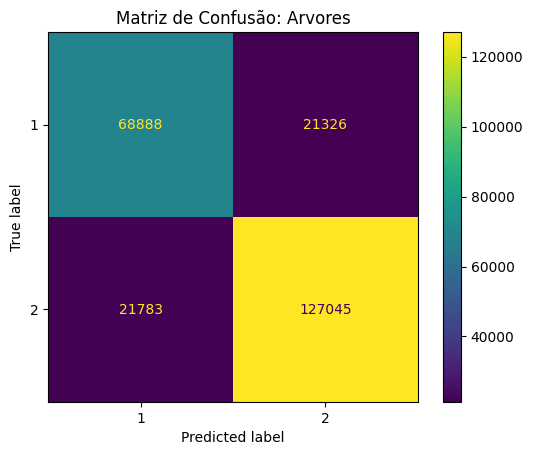

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(tst, X_test, y_test, labels=[1, 2])
plt.title("Matriz de Confusão: Arvores")
plt.show()

In [ ]:
#GERAR REPRESENTAÇÃO GRÁFICA DA ÁRVORE
import graphviz
from sklearn import tree
dtc_exg = tree.export_graphviz(dtc, out_file=None,
                                feature_names=X.columns,
                                class_names='NOTA_LC',
                                filled=True, rounded=True,
                                special_characters=True)

dtc_gfx = graphviz.Source(dtc_exg)
dtc_gfx.render("arvore_de_decisao")

# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#CLONA DF_ENEM PARA CASO ACHA ALTERAÇÕES NO DATAFRAME PARA A ARVORE, EVITAR ALTERAÇÕES NO DATAFRAME ORIGINAL
#ASSIM EVITANDO TER QUE RECARREGAR O DATAFRAME NOVAMENTE
df_enem2 = df_enem

#LIMITA PARA O SUDESTE (ACC80)
#df_enem2 = df_enem2.drop(df_enem2.loc[df_enem['CO_UF_ESC'] != 3].index)
#df_enem2.drop(['CO_UF_ESC'], axis=1, inplace=True)

#DESMEMBRA DATASET CENTRAL EM DATASETS DE VARIAVEIS INDEPENDENTE E DEPENDENTE
X, y = get_X_y(df_enem2)

# Carregar os dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=22)

# Criar o classificador Random Forest
clf = RandomForestClassifier(n_estimators=200,
                             criterion='entropy',
                             min_samples_leaf=35,
                             max_depth=None)

# Treinar o classificador
clf.fit(X_train, y_train)

# Fazer a predição
y_pred = clf.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}%".format(accuracy * 100))

# **Gradient Boosting**

In [ ]:
#IMPORTS NECESSÁRIOS PARA GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#CLONA DF_ENEM PARA CASO ACHA ALTERAÇÕES NO DATAFRAME PARA O GRADIENT BOOSTING, EVITAR ALTERAÇÕES NO DATAFRAME ORIGINAL
df_enem2 = df_enem.copy()

#LIMITA PARA O SUDESTE (ACC80)
#df_enem2 = df_enem2.drop(df_enem2.loc[df_enem['CO_UF_ESC'] != 3].index)
#df_enem2.drop(['CO_UF_ESC'], axis=1, inplace=True)

#DESMEMBRA DATASET CENTRAL EM DATASETS DE VARIAVEIS INDEPENDENTE E DEPENDENTE
X, y = get_X_y(df_enem2)

#SEPARA OS DATASETS DE VaI, VaD em datasets de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

#CRIA CLASSIFIER DE GRADIENT BOOSTING
gbc = GradientBoostingClassifier(random_state=22,
                                 min_samples_leaf=35,
                                 max_depth=None)

#EXECUTA TREINO DO MODELO
gbc.fit(X_train, y_train)

#EXECUTA A PREDIÇÃO
y_pred = gbc.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}%".format(accuracy * 100))


# **ANÁLISE DE PERFORMANCE DOS ALGORITMOS**

In [ ]:
#ACURACIA MODELOS - BRASIL - LC - COLUNA MÉDIA (SEM UTILIZAR COLUNAS INDIVIDUAIS PARA NOTAS CATEGORIZADAS)

# RANDOM FOREST ------------- 82.64%
# REDE NEURAL - KERAS ------- 82.37%
# ARVORE -------------------- 81.97%
# GRADIENT BOOSTING ---------  N/A
# REDE NEURAL - SCIKIT ------  N/A
# KNN -----------------------  N/A
# REGRESSÃO LINEAR ----------  N/A
# SVM ------------------------ N/A

#ACURACIA MODELOS - BRASIL - LC - SEM COLUNA MÉDIA

# RANDOM FOREST ------------- 78.51%
# REDE NEURAL - KERAS ------- 78.50%
# ARVORE -------------------- 78.43%
# GRADIENT BOOSTING --------- 78.30%
# REDE NEURAL - SCIKIT ------ 78.20%
# KNN ----------------------- 76,75%
# REGRESSÃO LINEAR ---------- 21,79%
# SVM ------------------------ N/A

#ACURACIA MODELOS - SUDESTE - LC - SEM COLUNA MÉDIA

# RANDOM FOREST ------------- 80.18%
# GRADIENT BOOSTING --------- 80.13%
# ARVORE -------------------- 80.12%
# REDE NEURAL - KERAS ------- 79.90%
# REDE NEURAL - SCIKIT ------ 79.87%
# KNN ----------------------- 77.87%
# REGRESSÃO LINEAR ----------- N/A
# SVM ------------------------ N/A

#ACURACIA MODELOS - SUDESTE - CH - SEM COLUNA MÉDIA

# RANDOM FOREST ------------- 82.23%
# ARVORE -------------------- 82.20%
# GRADIENT BOOSTING --------- 82.10%
# KNN ----------------------- 81.05%
# REDE NEURAL - KERAS -------- N/A
# REDE NEURAL - SCIKIT ------- N/A
# REGRESSÃO LINEAR ----------- N/A
# SVM ------------------------ N/A